In [1]:
import papermill as pm
import scrapbook as sb
import pandas as pd
from datetime import datetime, timedelta
import os

C:\Users\SANDEEP SINGH\anaconda3\lib\site-packages\papermill\iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFileSystem


In [2]:
def last_dow(d: datetime, dow: int) -> datetime:
    '''
    Gets the date of the last day of week, using datetime convention of Monday is 0 and Sunday is 6
    '''
    dow_d = d.weekday()
    days_delta = (7 - dow) + dow_d if dow_d < dow else dow_d - dow
    return d - timedelta(days=days_delta)

In [8]:
run_date = (datetime(2021, 11, 29))
tokens = ['AAVE','ADA','ATOM','AVAX','BTC','COMP','CRV','DOT','ETH','SOL','USDT']
connection_string = 'sqlite:///data/data.db'


In [9]:
run_date

datetime.datetime(2021, 11, 29, 0, 0)

In [10]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)

In [17]:

for token in tokens:
    print(f'running for {token} for date {run_date} to {run_date + timedelta(days=14)}', end='\r')
    res = pm.execute_notebook(
        'hw_4_template.ipynb',
        f'{base_output_folder}/market_analysis_{token}.ipynb',
        parameters = {
            'from_date': f'{run_date}',
            'to_date': f'{run_date + timedelta(days=14)}',
            'token': token,
            'connection_string': connection_string
        }
    )

Executing:   0%|          | 0/14 [00:00<?, ?cell/s]

Executing:   0%|          | 0/14 [00:00<?, ?cell/s]

Executing:   0%|          | 0/14 [00:00<?, ?cell/s]

Executing:   0%|          | 0/14 [00:00<?, ?cell/s]

Executing:   0%|          | 0/14 [00:00<?, ?cell/s]

Executing:   0%|          | 0/14 [00:00<?, ?cell/s]

Executing:   0%|          | 0/14 [00:00<?, ?cell/s]

Executing:   0%|          | 0/14 [00:00<?, ?cell/s]

Executing:   0%|          | 0/14 [00:00<?, ?cell/s]

Executing:   0%|          | 0/14 [00:00<?, ?cell/s]

Executing:   0%|          | 0/14 [00:00<?, ?cell/s]

In [18]:
nb = sb.read_notebook('outputs/market_analysis_AAVE.ipynb')

In [19]:
nb.scraps['prices'].data

,open,high,low,close,volume,volumeUSD,token,chain,hourly_returns,volatility,max_drawdown
ts,,,,,,,,,,,
2021-11-29 00:00:00,233.512,239.137,233.258,238.995,3823.856,908604.526426,AAVE,ETH,NaN,NaN,0.000000
2021-11-29 01:00:00,238.739,240.965,237.850,240.000,2766.224,662098.021206,AAVE,ETH,0.004205,NaN,-0.004187
2021-11-29 02:00:00,240.035,241.661,239.459,240.871,2633.001,632461.074560,AAVE,ETH,0.003629,NaN,-0.007788
2021-11-29 03:00:00,241.009,241.009,237.518,237.954,1545.049,369187.520596,AAVE,ETH,-0.012110,NaN,-0.012110
2021-11-29 04:00:00,237.906,238.229,236.959,237.975,700.640,166506.840471,AAVE,ETH,0.000088,NaN,-0.012110
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-12 19:00:00,181.460,182.380,181.460,181.960,2157.429,392753.532800,AAVE,ETH,0.002977,0.121659,-0.378718
2021-12-12 20:00:00,181.950,182.230,180.670,180.840,981.381,178091.257040,AAVE,ETH,-0.006155,0.119548,-0.378718
2021-12-12 21:00:00,180.890,181.720,180.750,181.000,384.557,69741.209340,AAVE,ETH,0.000885,0.096139,-0.378718


In [20]:
nbs = sb.read_notebooks('outputs')

In [21]:
pd.DataFrame([
    pd.Series({
        'token': scrap['token'].data,
        'from_date': scrap['from_date'].data,
        'to_date': scrap['to_date'].data,
        'hourly_returns': scrap['prices'].data.hourly_returns.mean(),
        'max_drawdown': scrap['prices'].data.max_drawdown.min(),
        'volatility': scrap['prices'].data.volatility.mean(),
        'range_close': scrap['prices'].data.close[-1] - scrap['prices'].data.close[0] }) 
    for book, scrap in nbs.notebook_scraps.items()
])

,token,from_date,to_date,hourly_returns,max_drawdown,volatility,range_close
0,AAVE,2021-11-29 00:00:00,2021-12-13 00:00:00,-7.697463e-04,-0.378718,0.212356,-58.6450
1,ADA,2021-11-29 00:00:00,2021-12-13 00:00:00,-4.241618e-04,-0.312827,0.217477,-0.2445
2,ATOM,2021-11-29 00:00:00,2021-12-13 00:00:00,-1.776982e-04,-0.329570,0.299425,-2.7560
3,AVAX,2021-11-29 00:00:00,2021-12-13 00:00:00,-5.540979e-04,-0.385790,0.286536,-22.9300
4,BTC,2021-11-29 00:00:00,2021-12-13 00:00:00,-3.569235e-04,-0.206462,0.154894,-6999.8400
5,COMP,2021-11-29 00:00:00,2021-12-13 00:00:00,-1.015116e-03,-0.377871,0.224354,-88.2800
6,CRV,2021-11-29 00:00:00,2021-12-13 00:00:00,-5.385247e-04,-0.394862,0.328177,-1.0362
7,DOT,2021-11-29 00:00:00,2021-12-13 00:00:00,-4.540131e-04,-0.350800,0.245633,-6.0050
8,ETH,2021-11-29 00:00:00,2021-12-13 00:00:00,-6.065377e-05,-0.188101,0.174104,-141.7100
9,SOL,2021-11-29 00:00:00,2021-12-13 00:00:00,-3.446384e-04,-0.317207,0.242432,-26.6870


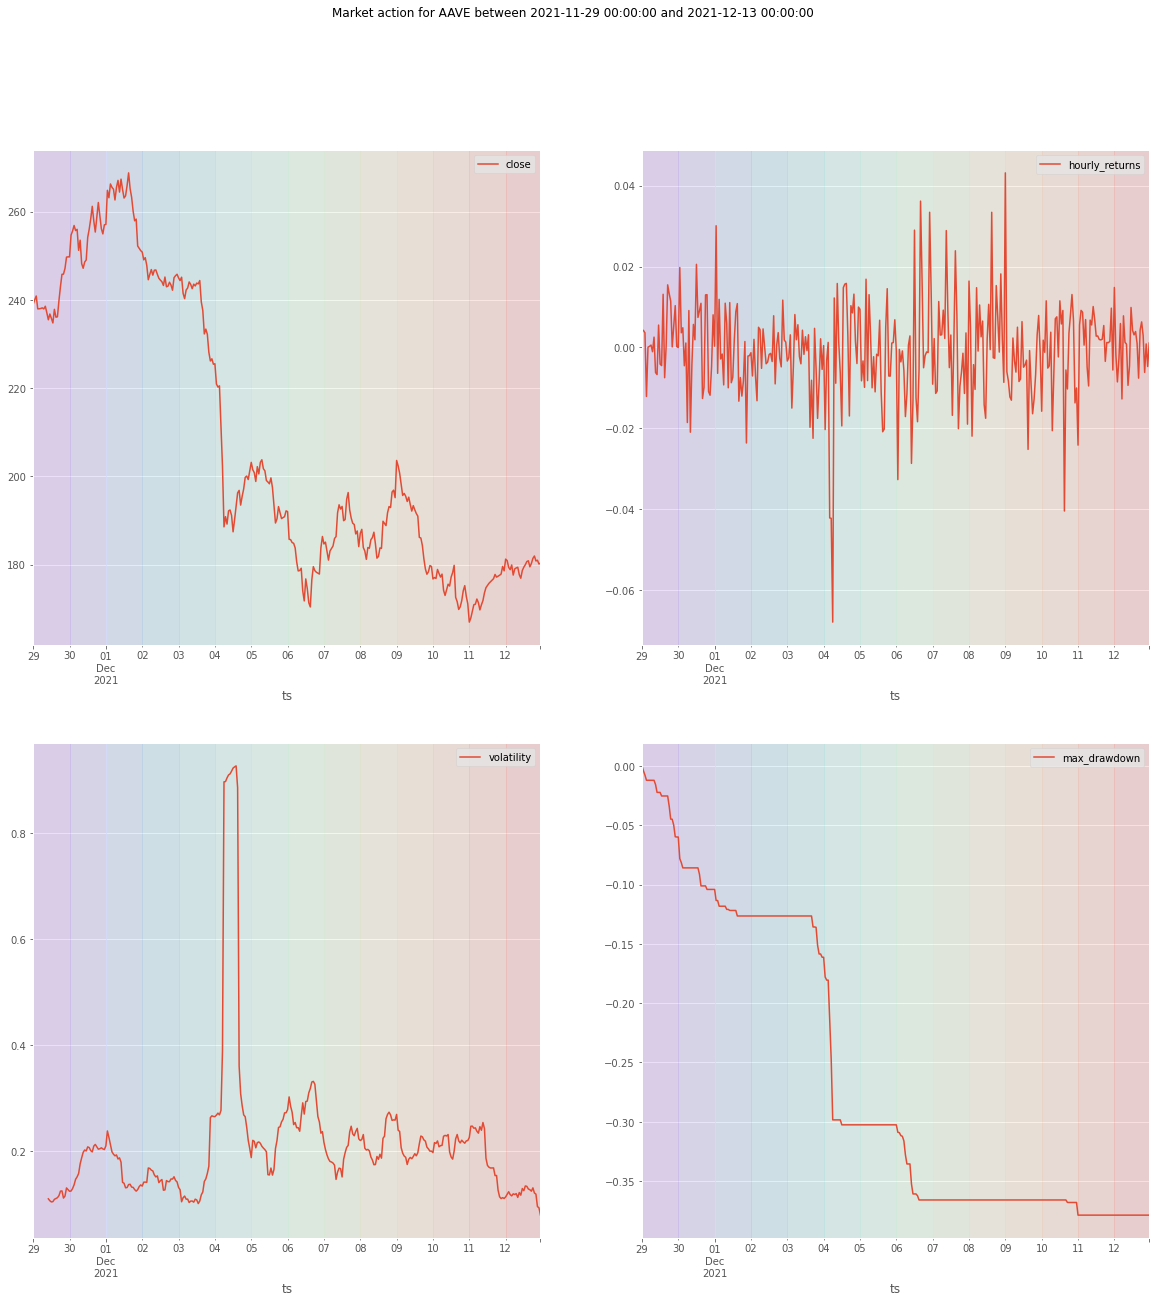

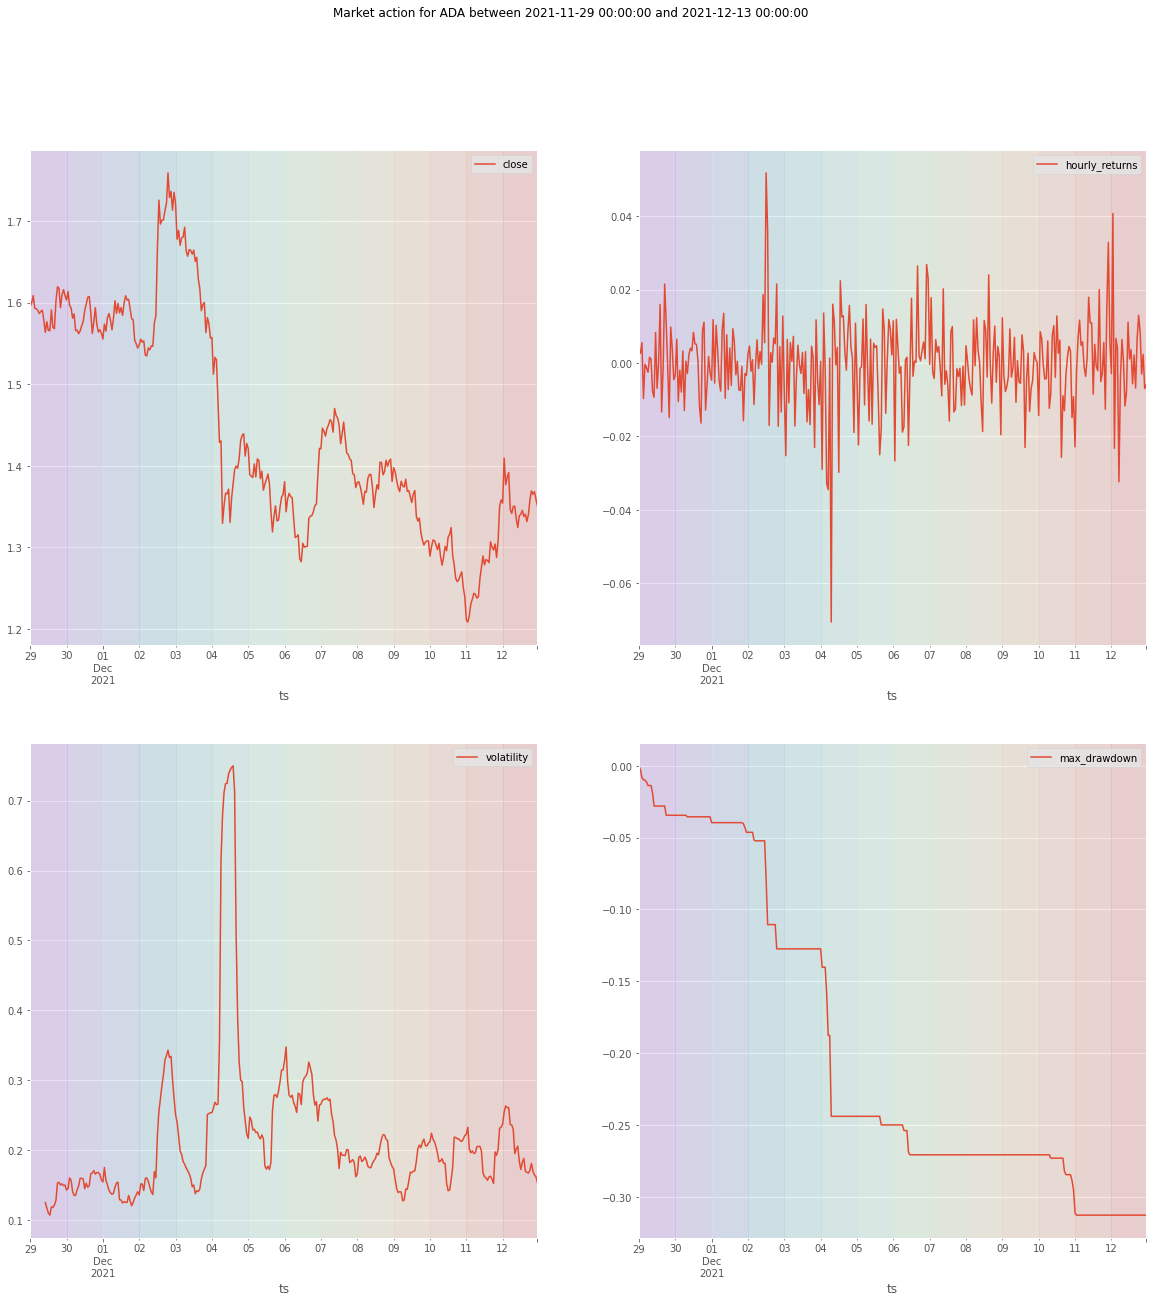

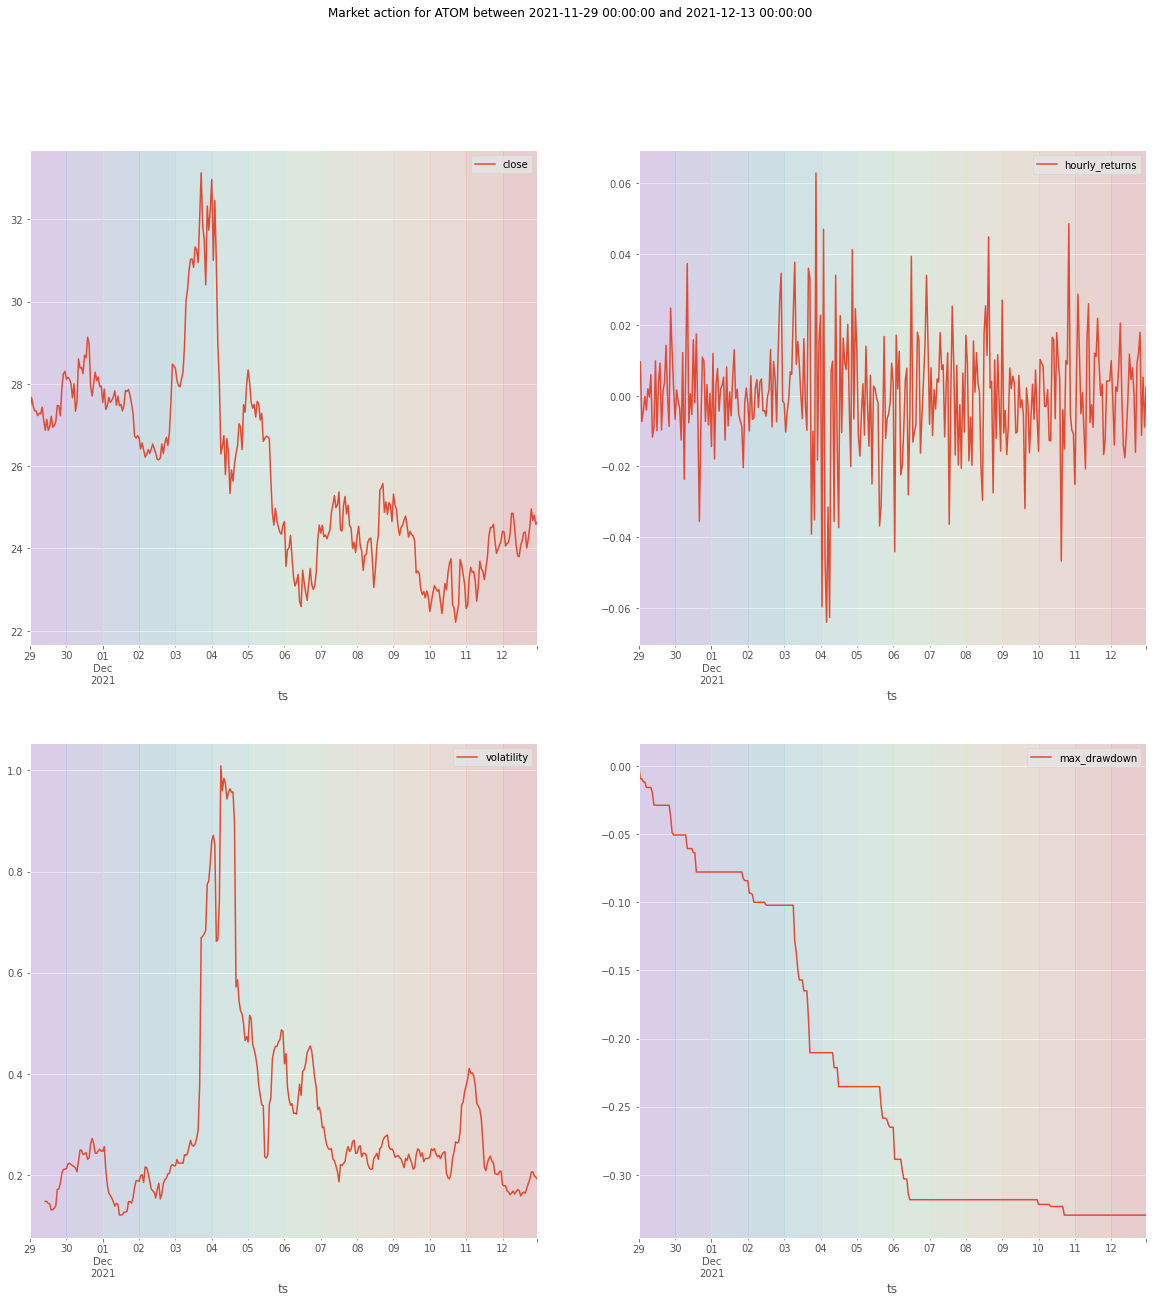

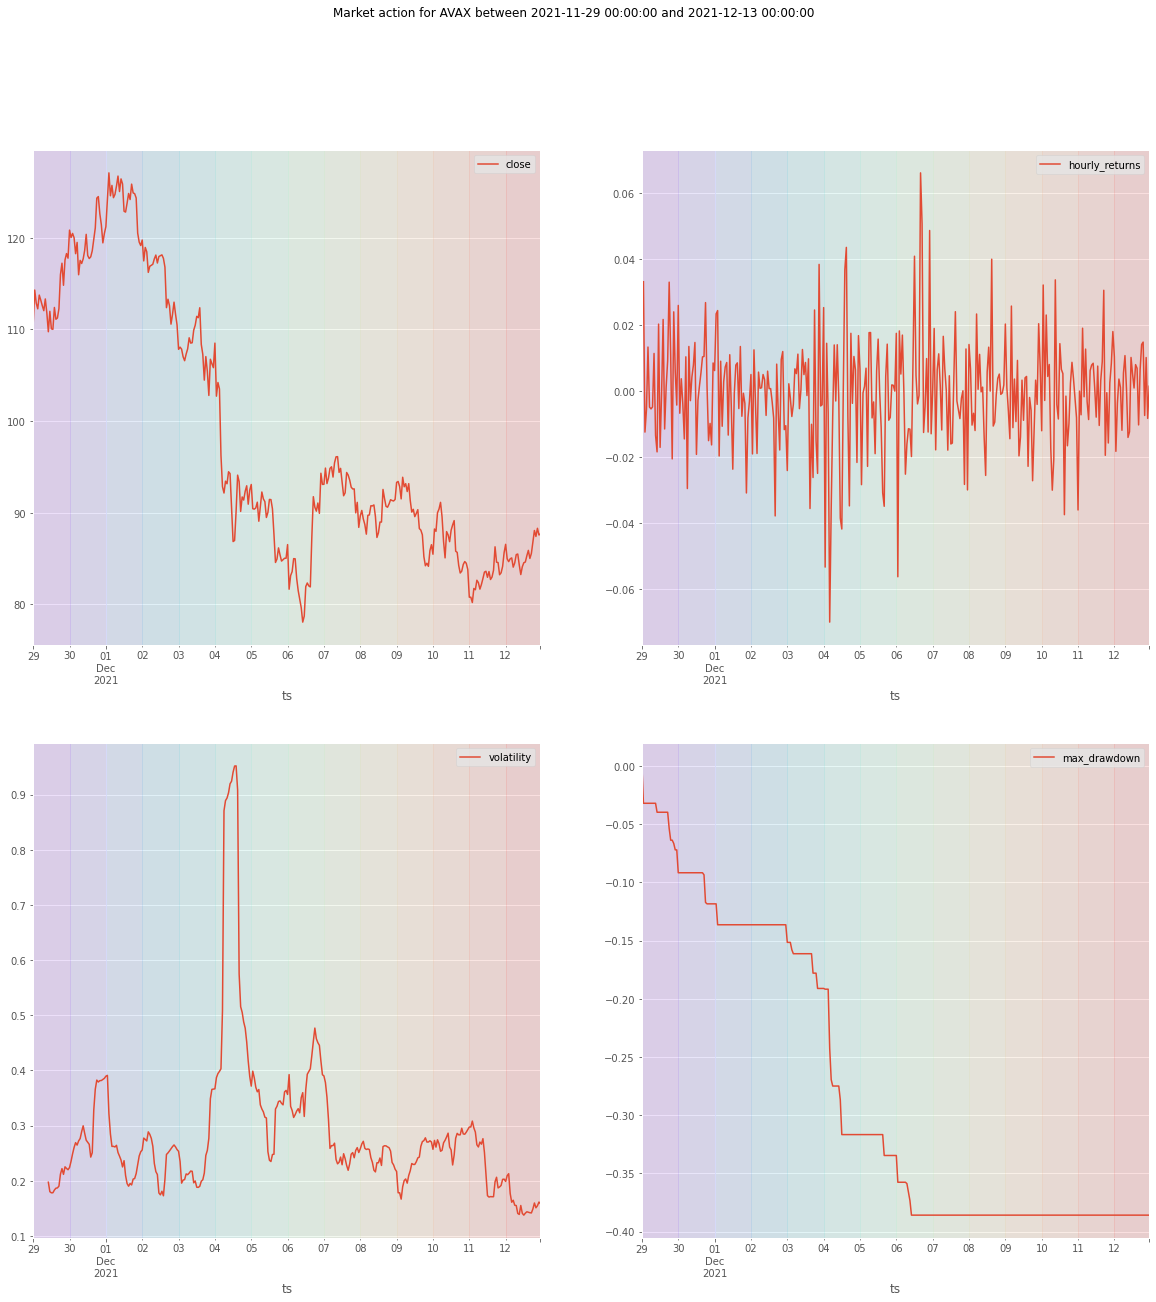

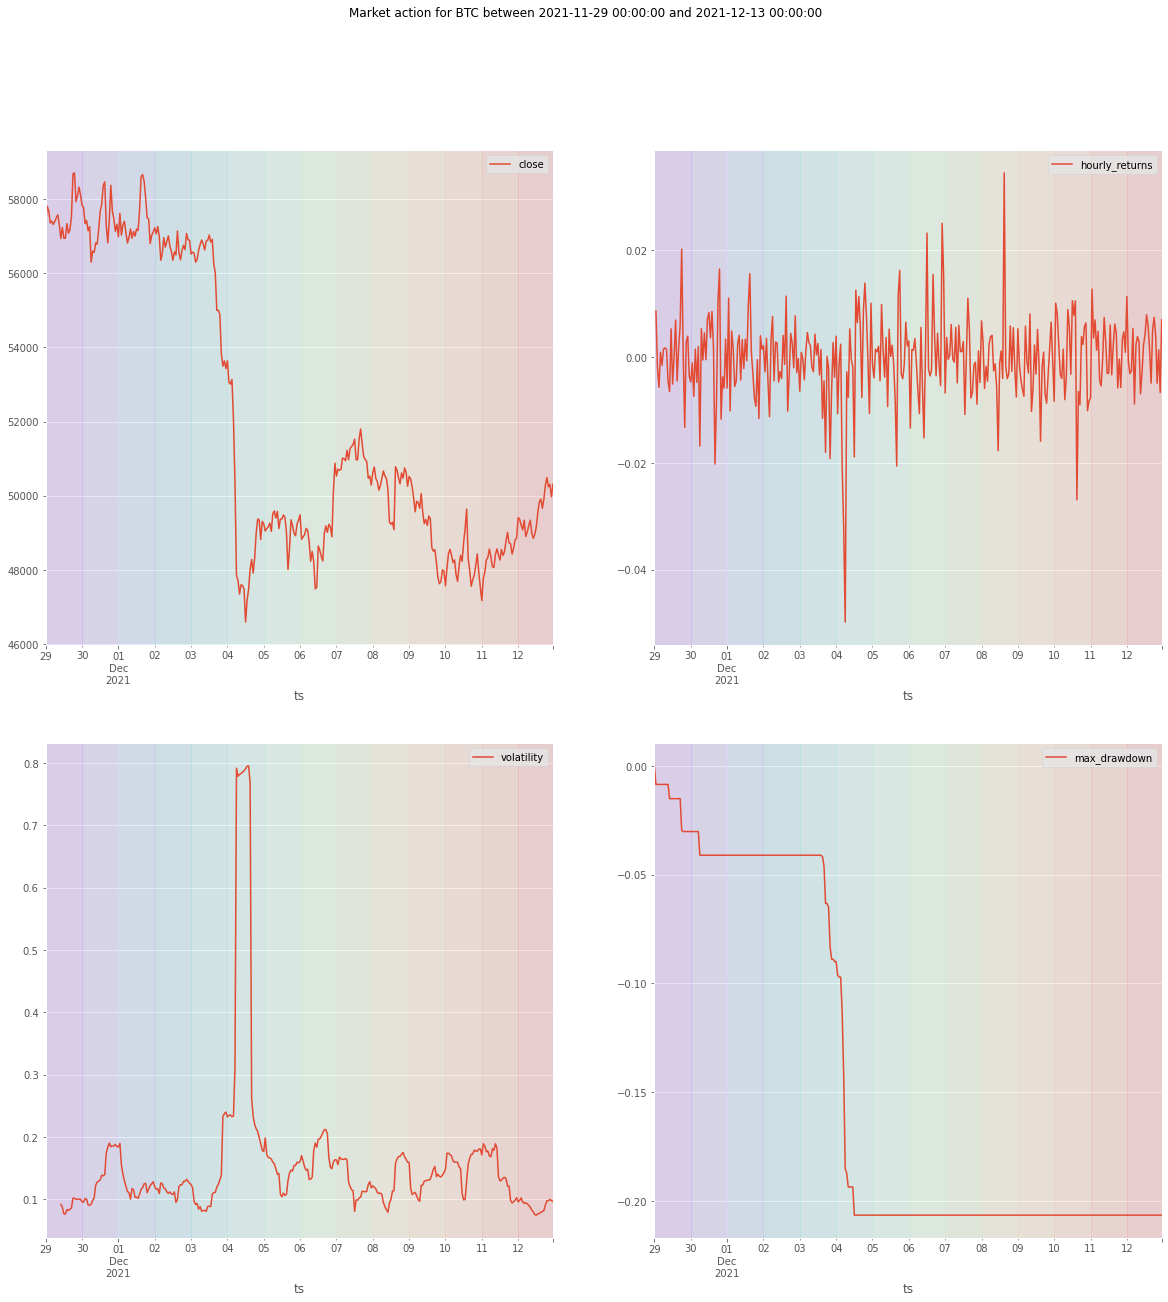

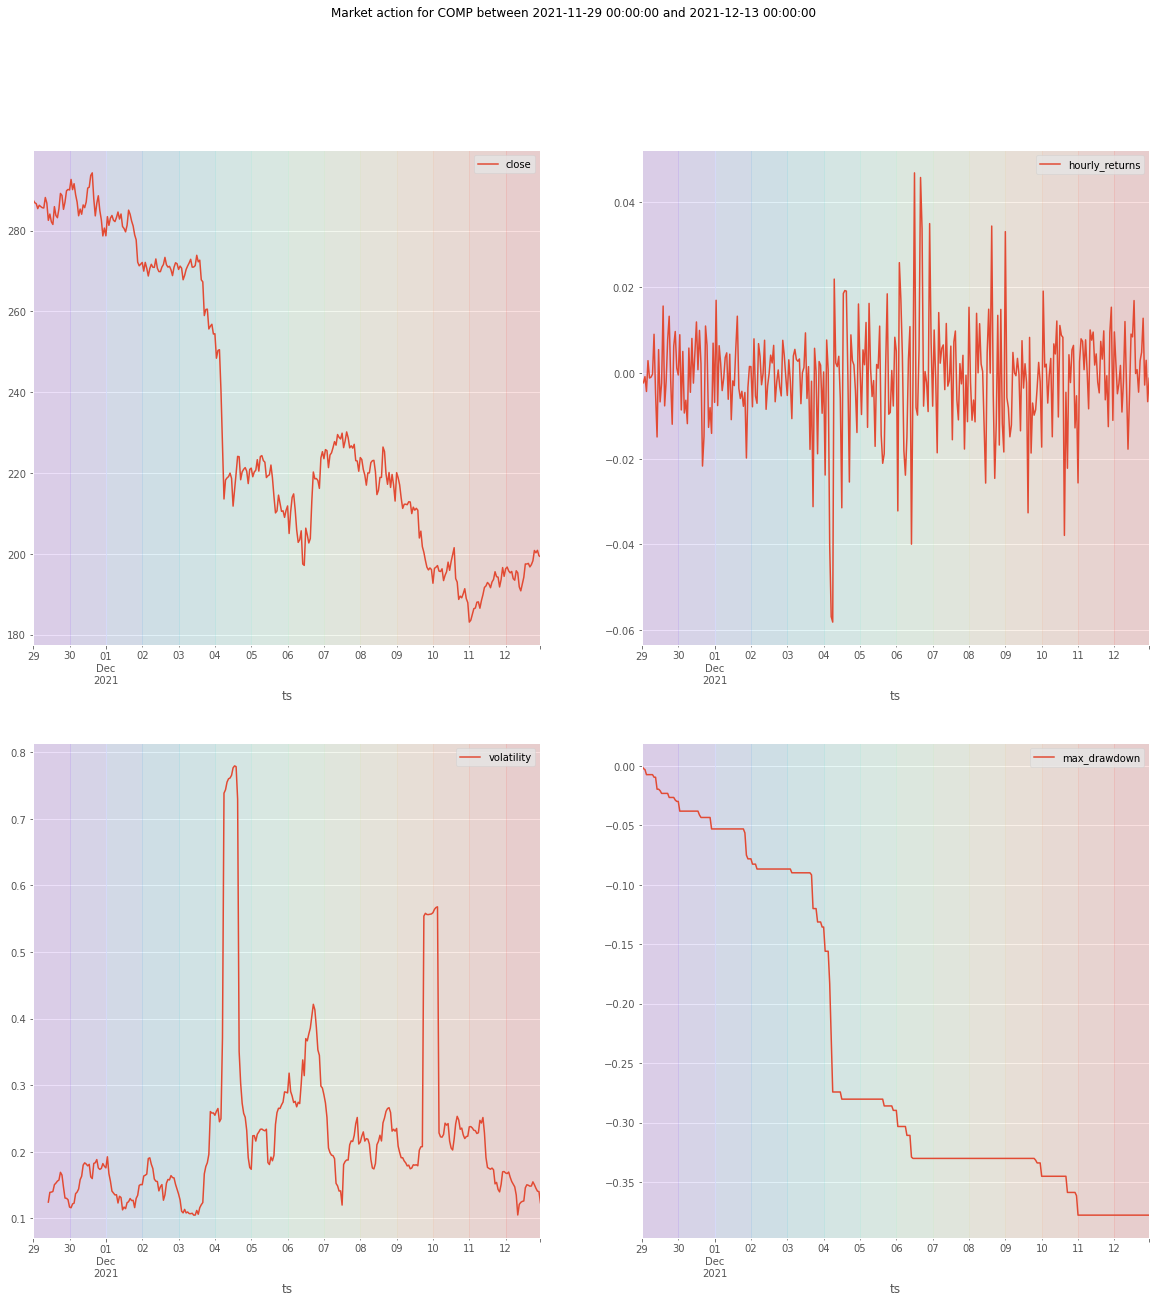

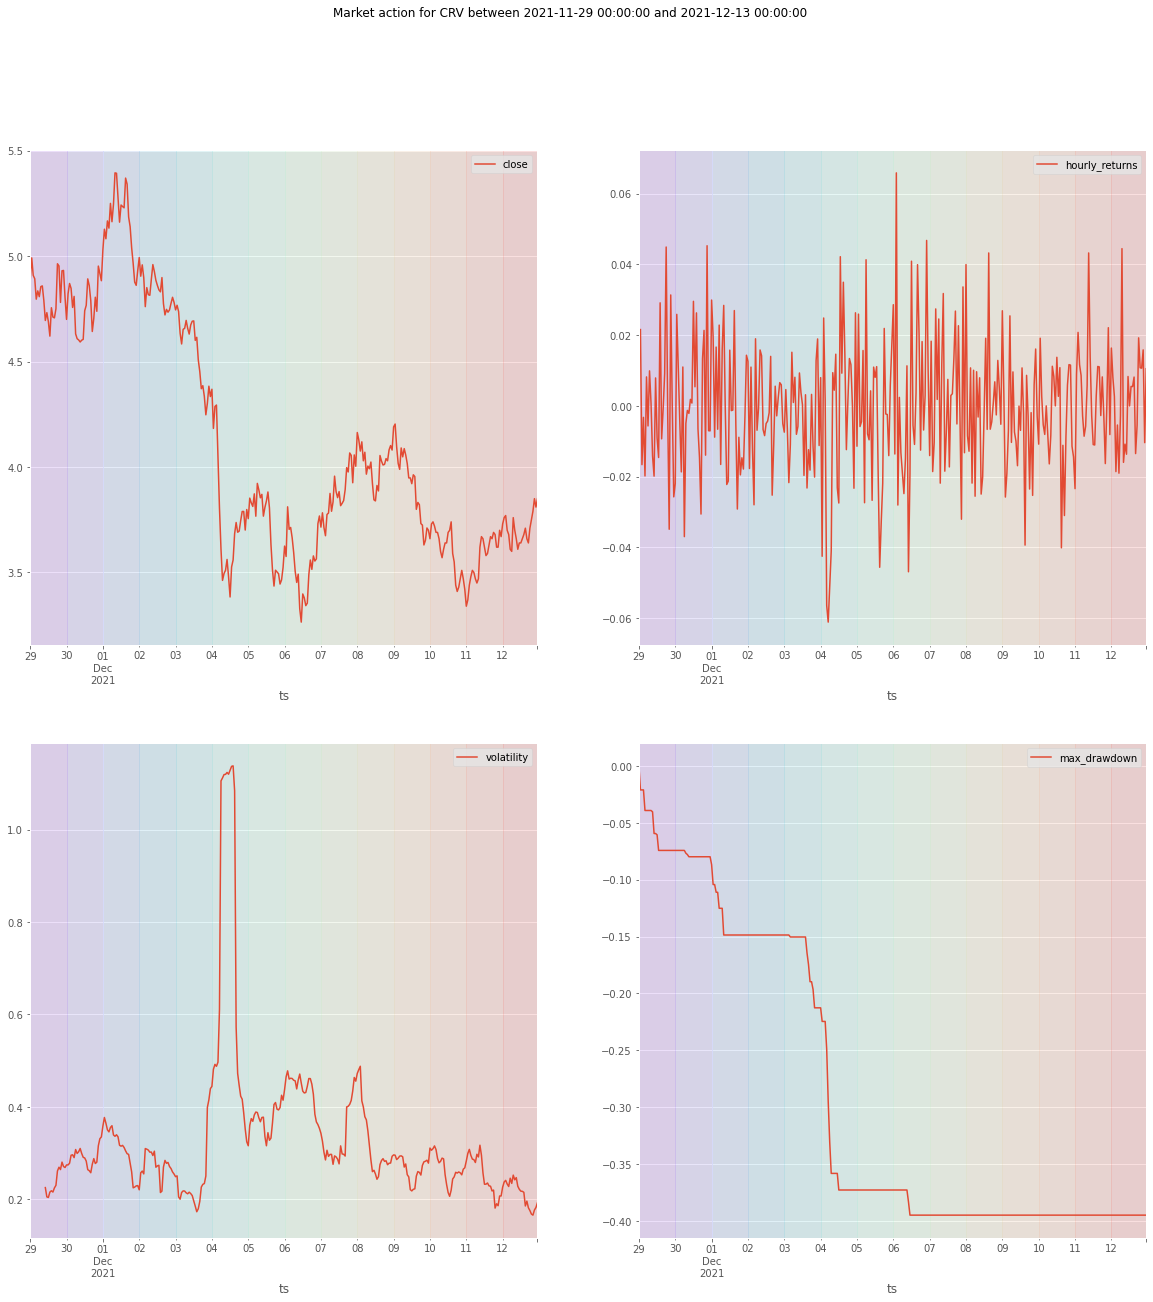

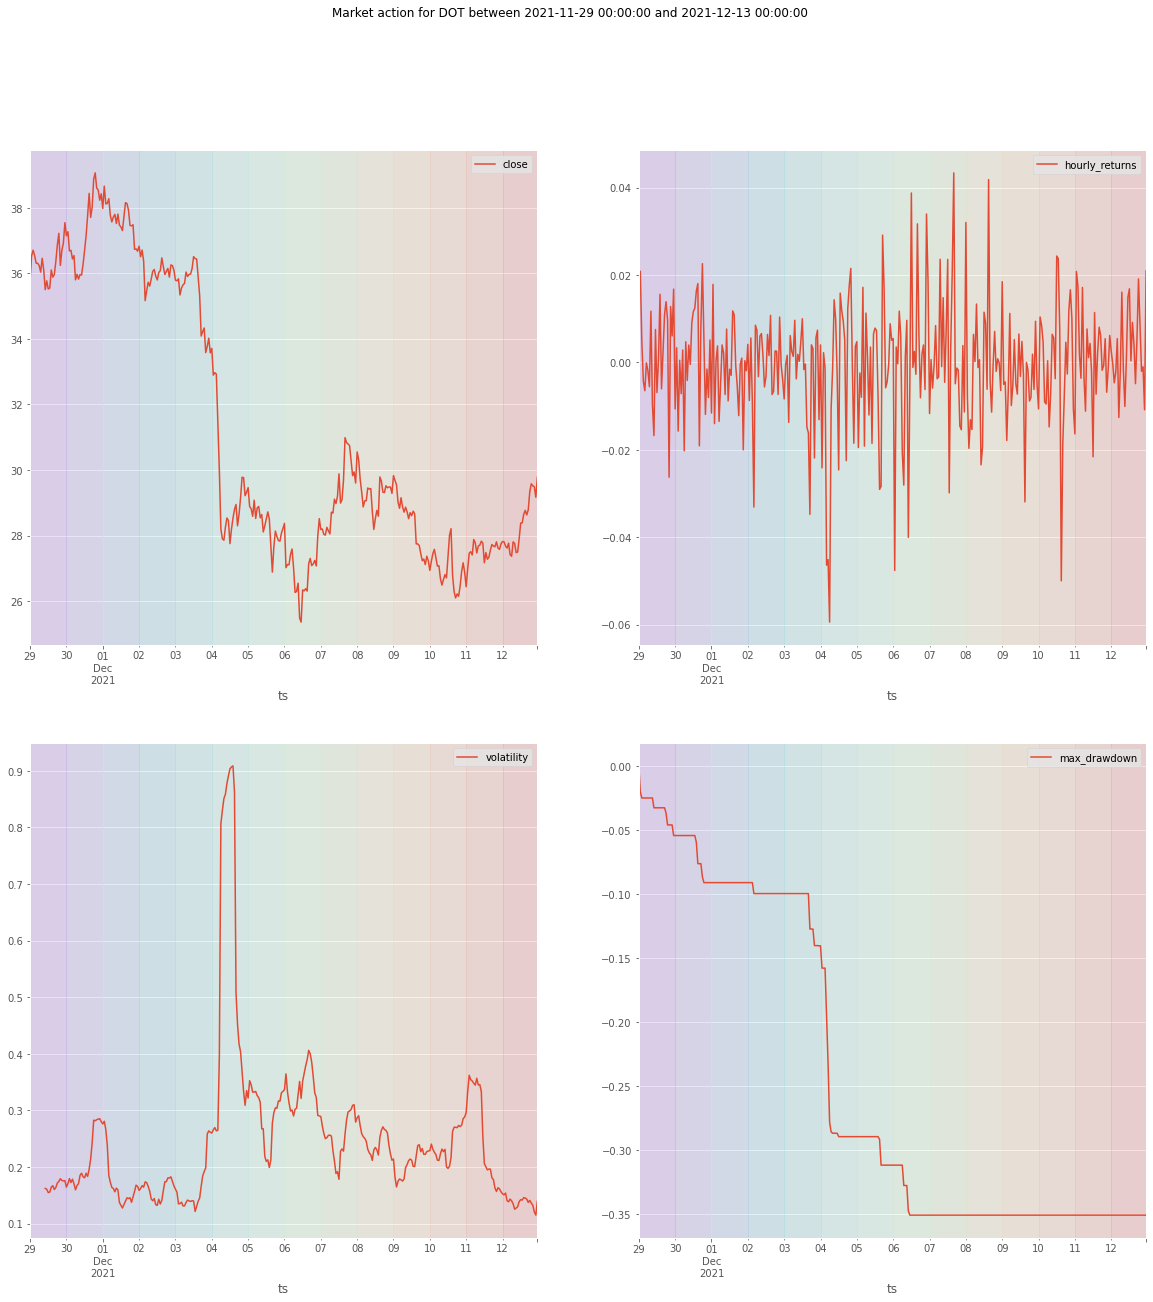

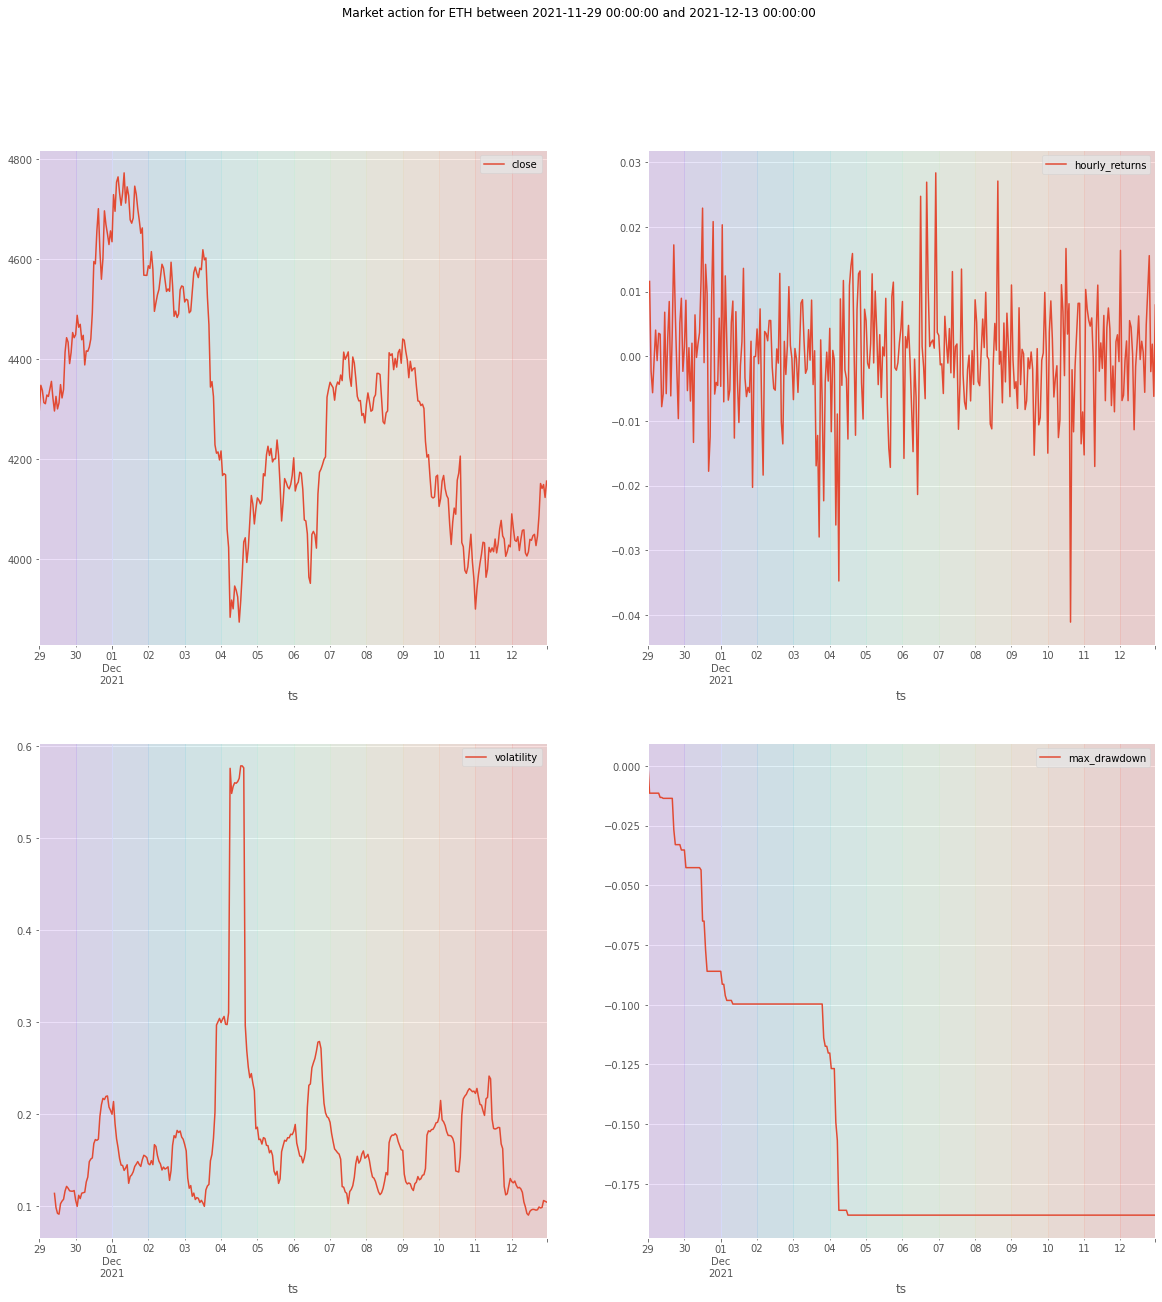

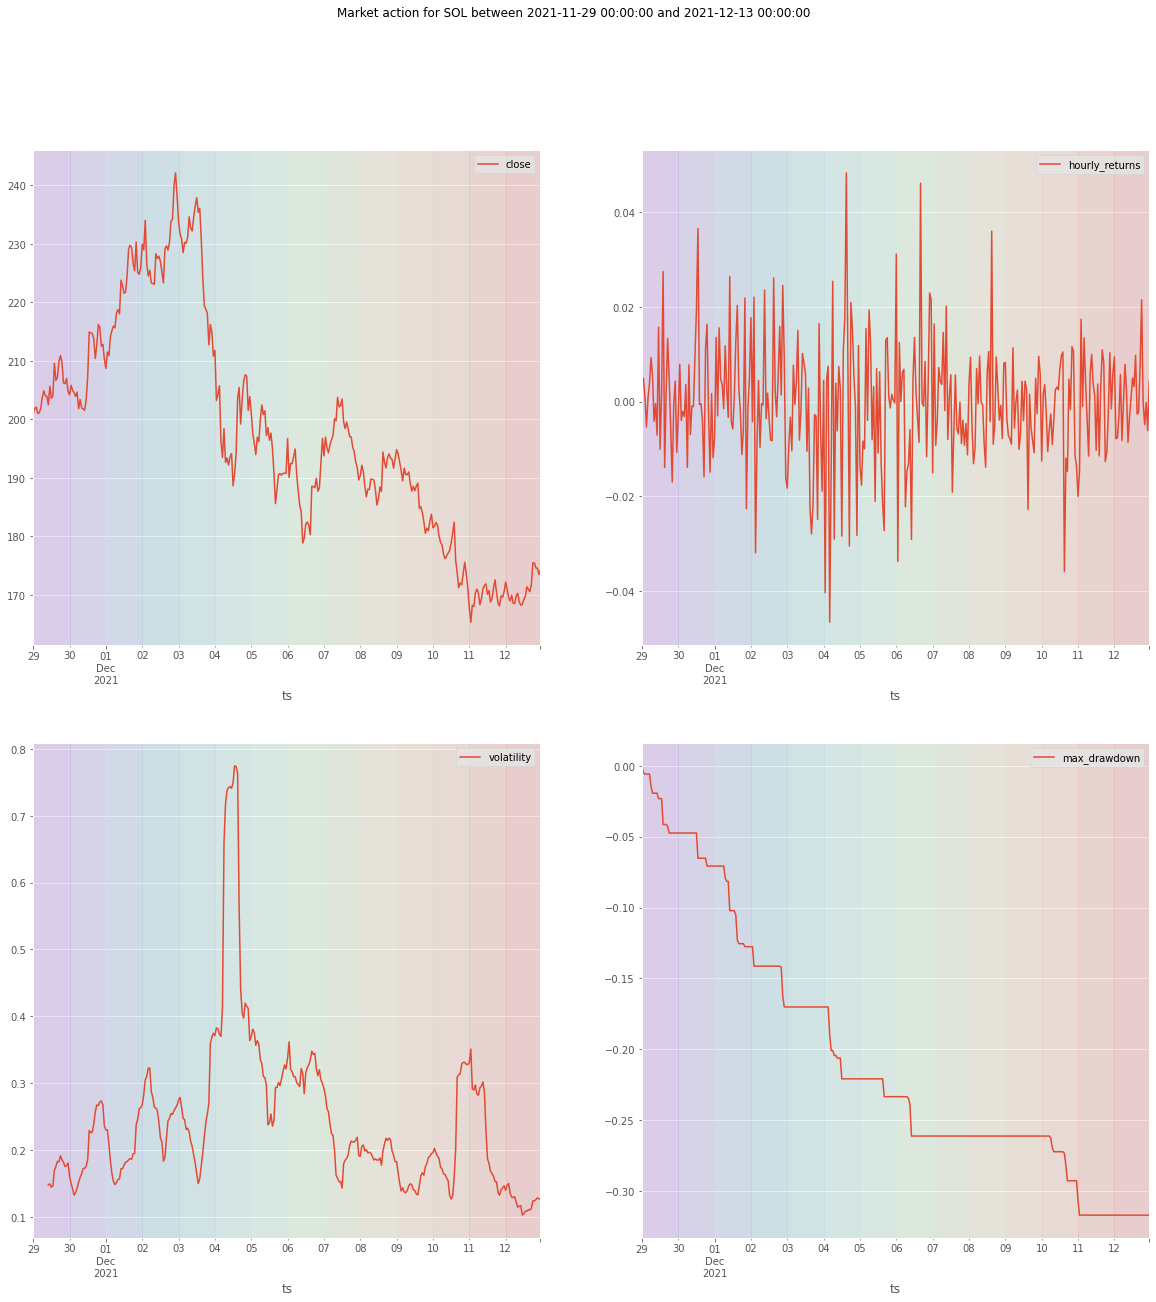

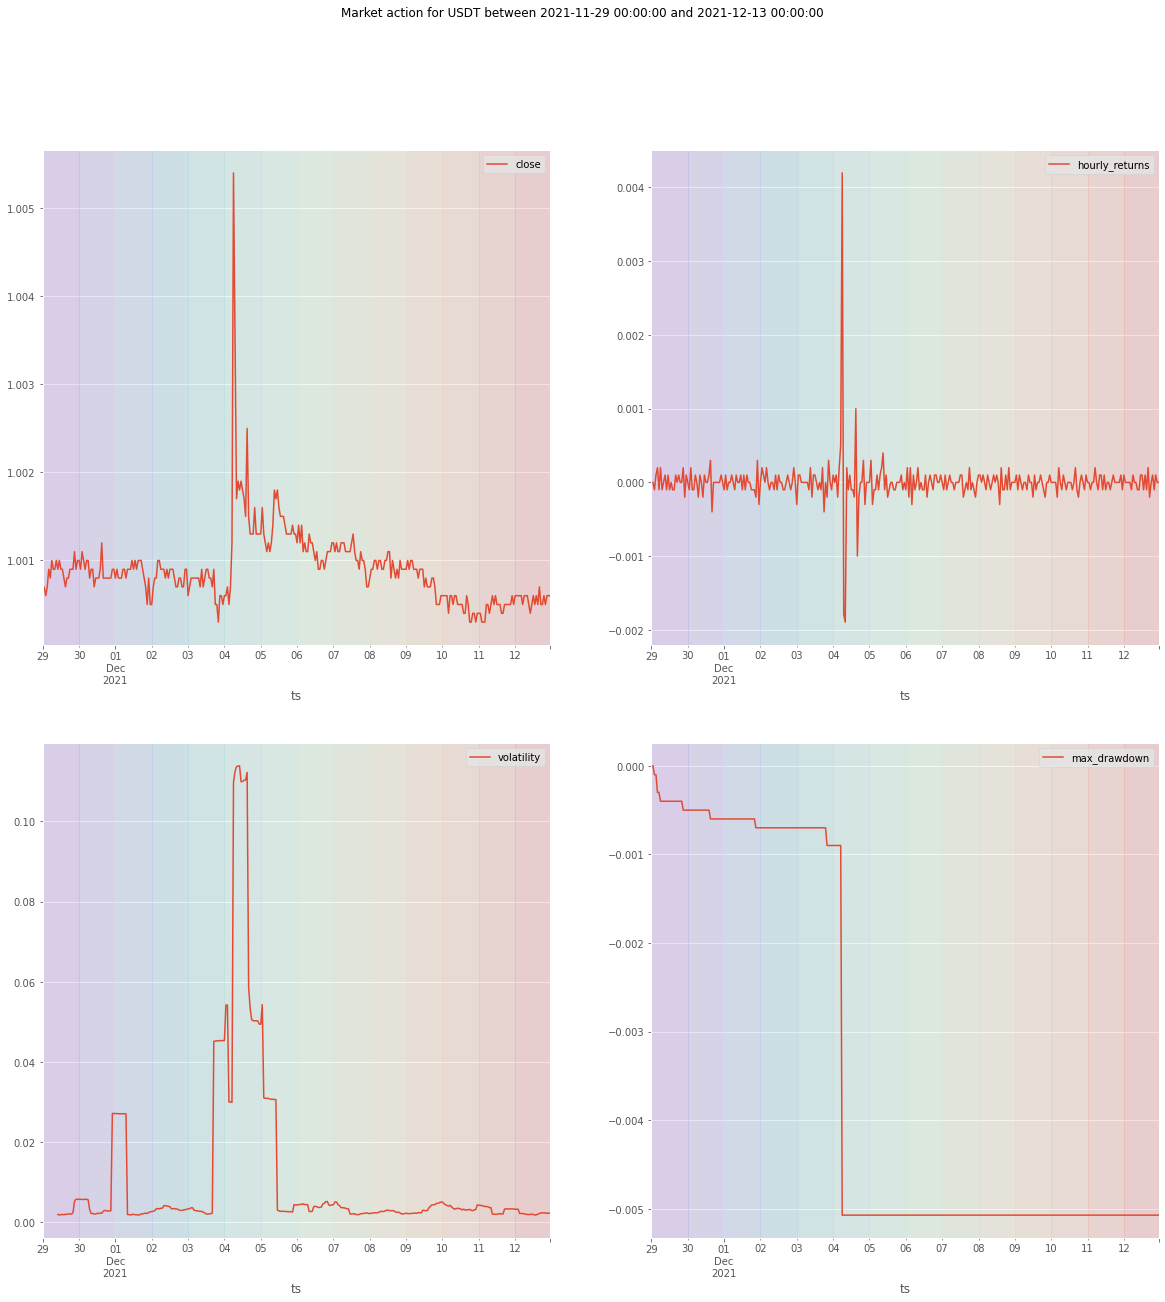

[None, None, None, None, None, None, None, None, None, None, None]

In [22]:
[nbs[nb_name].reglue('summary_plot') for nb_name in nbs]